# Homework 3 -- Ants

In [1]:
%matplotlib inline

In [2]:
# imports
from importlib import reload

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import hmwk3

# Init

In [77]:
N = 100
M = 100

In [78]:
# Cells
p_nest = np.zeros((N,M))
p_food = np.zeros((N,M))

In [186]:
sniff_food = 0.3  # Percentage of choosing to go the right way for food
sniff_nest = 0.3  # Percentage of choosing to go the right way for nest
random_step = 0.1 # Percentage of taking a random step

In [80]:
rstate = np.random.RandomState()

In [81]:
nest = (10,10)
food = (35, 75)

# Views

In [224]:
def view_ants(ants, nest, food, show_nest=True):
#    fig = plt.figure(figsize=(8,8))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
 #   ax = plt.gca()

    # Food
    cm = plt.get_cmap('Blues')
    food_grid = ants.grid_ants('food')
    img1 = ax1.imshow(food_grid, cmap=cm, origin='lower', vmin=0.,
                     vmax=np.max(food_grid)/2.)
    cb1 = plt.colorbar(img1, pad=0., ax=ax1)

    # Nest
    cm = plt.get_cmap('Reds')
    nest_grid = ants.grid_ants('nest')
    img2 = ax2.imshow(nest_grid, cmap=cm, origin='lower', vmin=0.,
                     vmax=np.max(nest_grid)/2.)
    cb2 = plt.colorbar(img2, pad=0., ax=ax2)#, vmin=0.)

    for ax in [ax1, ax2]:
        ax.set_aspect('equal', 'datalim')
        # Mark nest, food
        if show_nest:
            ax.scatter([nest[1]], [nest[0]], marker='s',facecolors='none', edgecolor='g', s=60)
        ax.scatter([food[1]], [food[0]], marker='o', facecolors='none', edgecolor='b', s=60)
    plt.show()

# Init the Ants

In [225]:
reload(hmwk3)
ants = hmwk3.Ants(200, N, M, nest, sniff_food=sniff_food, sniff_nest=sniff_nest)

# Run it

## First 100 steps

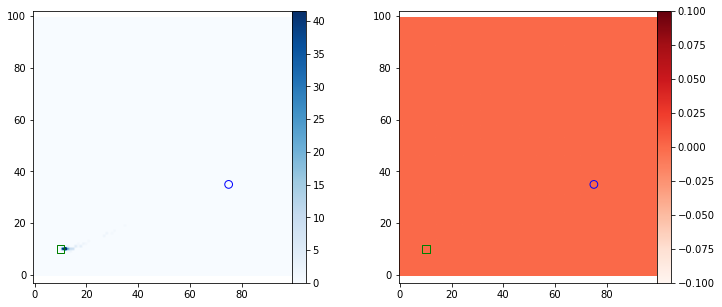

In [226]:
hmwk3.run_forward(rstate, 100, ants, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants, nest, food)

### The ants begin their journey (slowly!) from the nest [green square] to the food [blue circle].  These are the blue (left panel).  There are no ants returning yet.

## Next 100 steps

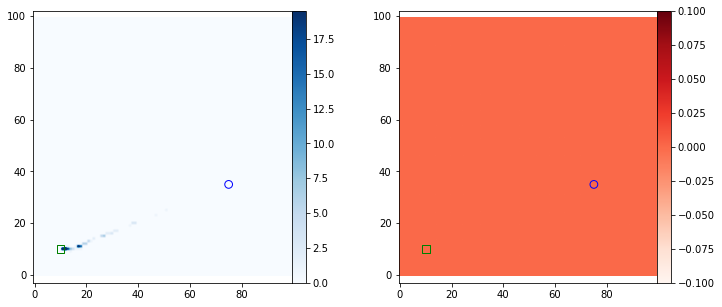

In [227]:
hmwk3.run_forward(rstate, 100, ants, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants, nest, food)

### We have a string of ants on their way now!

## 300 more

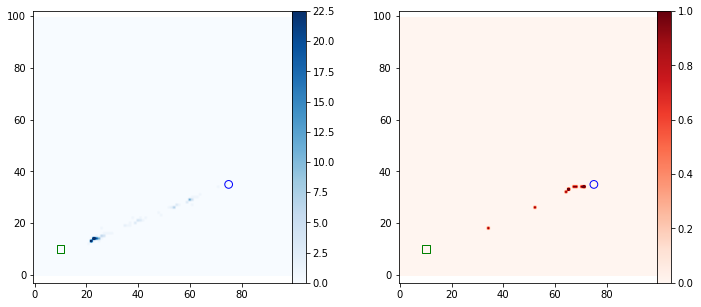

In [228]:
hmwk3.run_forward(rstate, 300, ants, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants, nest, food)

### A pattern of ants forms towards the food.  Note the bunching at the back (closest to the nest).

### A few ants have made it to the food and are now returning to the nest.

## 300 more

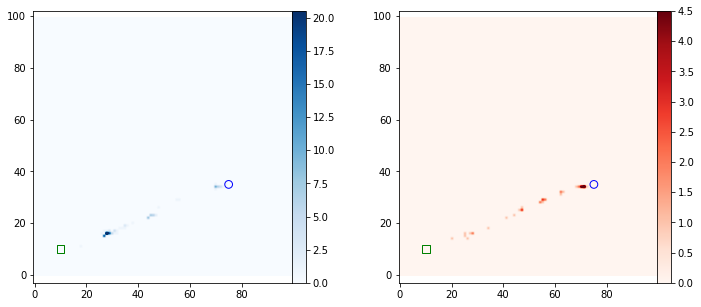

In [229]:
hmwk3.run_forward(rstate, 300, ants, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants, nest, food)

### A pattern, with interesting clumping begins to emerge.

## 1000 more

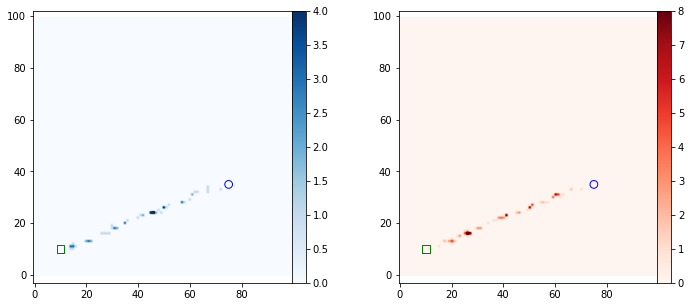

In [230]:
hmwk3.run_forward(rstate, 1000, ants, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants, nest, food)

### Now the patterns of to food (blue) and to nest (red) starts to resemble one another.

## 1000 more

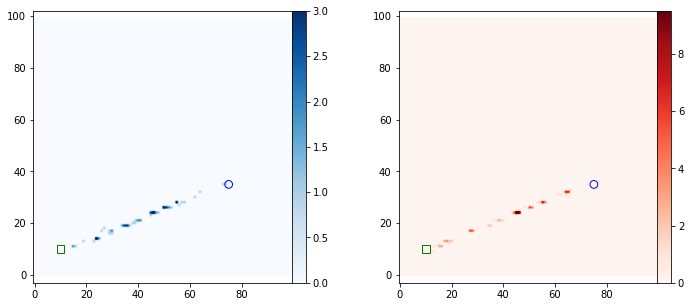

In [231]:
hmwk3.run_forward(rstate, 1000, ants, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants, nest, food)

### With the system well-established, a clear pattern is present.

----

## Now, let's increase the food and nest 'sniffing' from 0.3 to 0.4 and run to long times.

In [236]:
ants2 = hmwk3.Ants(200, N, M, nest, sniff_food=0.4, sniff_nest=0.4)
p_nest = np.zeros((N,M))
p_food = np.zeros((N,M))

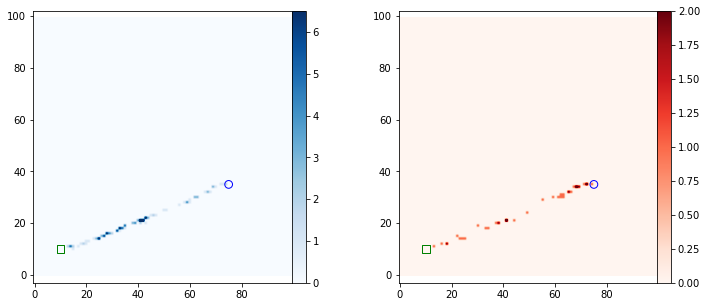

In [237]:
hmwk3.run_forward(rstate, 2000, ants2, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants2, nest, food)

### Pretty similar..  Maybe a bit more clumpy.

## Now, let's decrease the food and nest 'sniffing' to 0.2

In [240]:
ants3 = hmwk3.Ants(200, N, M, nest, sniff_food=0.2, sniff_nest=0.2)
p_nest = np.zeros((N,M))
p_food = np.zeros((N,M))

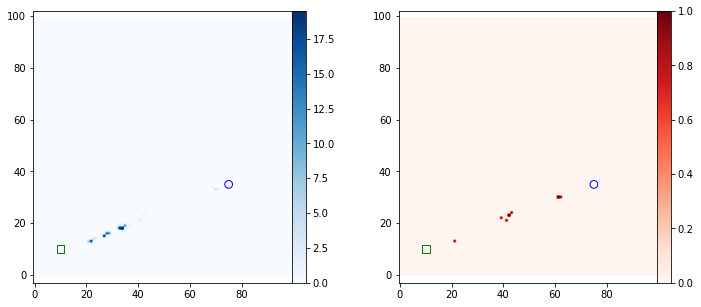

In [241]:
hmwk3.run_forward(rstate, 2000, ants3, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants3, nest, food)

### Either the ants are more clumped or we haven't run long enough.  Running longer..

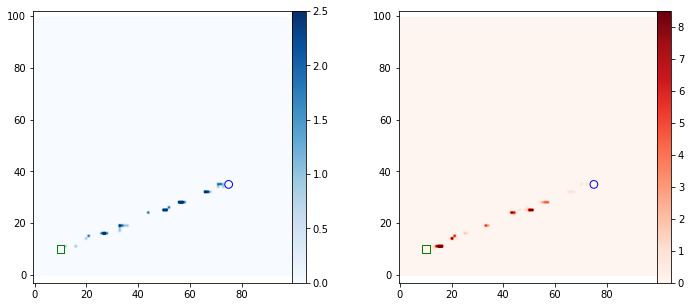

In [242]:
hmwk3.run_forward(rstate, 10000, ants3, food, nest, p_food, p_nest, 
                random_step=random_step)
view_ants(ants3, nest, food)

### Ok, pretty similar now albeit more clumpy (by my eye)

----

# Homework prompts

## (a) Is it reaching an attractor?  The ants have cleary organized into a pattern.   And they won't break out of it.  And clearly they are constrained to a small portion of the grid.  Appears to be Lyapunov stable.

## (b) It is clear from the analysis above that the ants to Self-Organize.  Their faster time-scale motions (steps) slowly grow and stabilize the pattern.

## (c) 

## Level 1 -- positions of the ants.  Variables = x,y,food/nest seeking.  Dynamics = individual steps based on sniffing (and randomness).

## Level 2 -- the pathway between the nest and food.  Variables = length, width, clumpiness/smoothness.  Dynamics = evolution of clumping along the path (and its initial growth).


## (d) Dynamical slaving

## There is evolution in the clumping along the pathway which slaves the ants (Level 1) to the pattern (Level 2).

## (e) By studying the pattern sufficiently long, we could then build a model that:

### i. Is comprised of a number of clumps with a range of sizes

### ii. Describes the motions of these clumps between nest and food (and back)

----